<a href="https://colab.research.google.com/github/SlavaKulik/machine_learning/blob/main/macine_learning_practice_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  float64 
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.0 MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


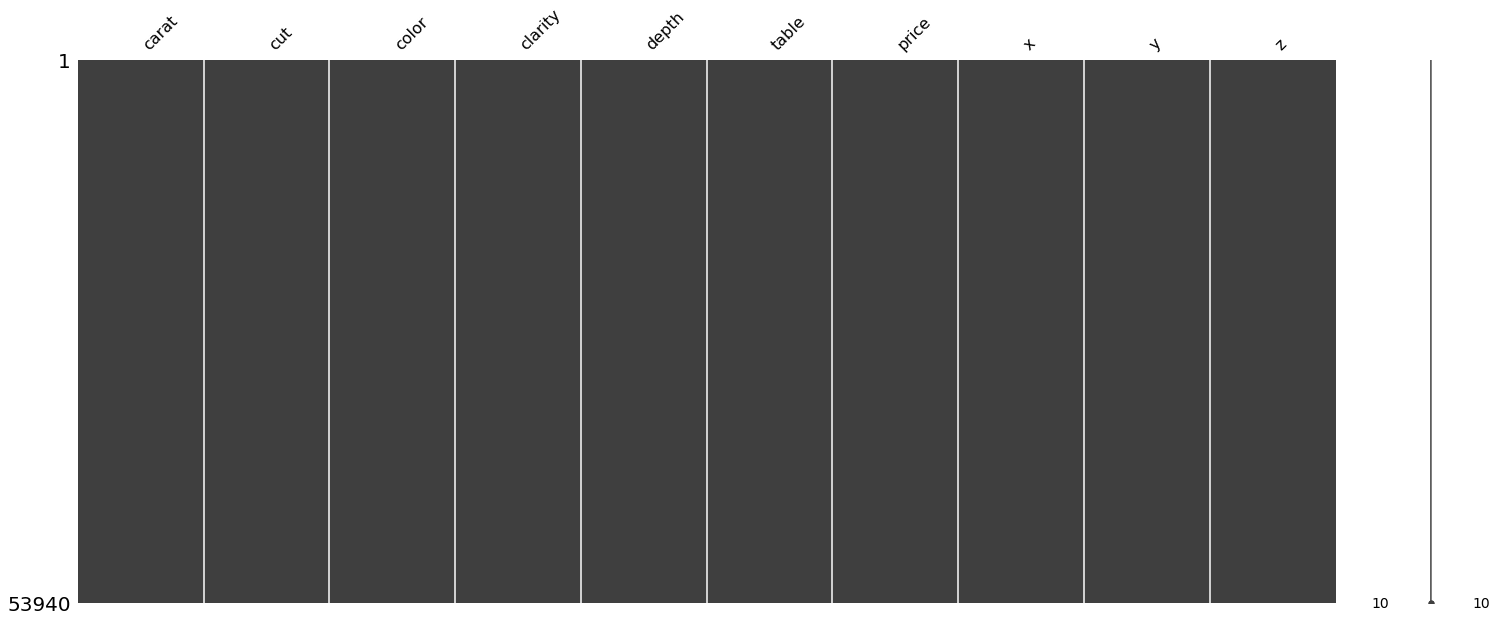

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import pandas as pd
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_openml

df = fetch_openml(data_id=42225, as_frame=True).frame
df.info()
msno.matrix(df)
df.describe()

In [21]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142.0,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167.0,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696.0,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837.0,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731.0,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954.0,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139.0,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564.0,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381.0,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631.0,8.49,8.45,0.0


In [22]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [23]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


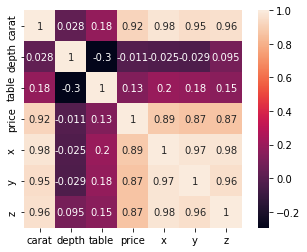

In [24]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

1. Глибина обернено пропорційна до ціни.

2. Ціна діаманта сильно корелює з каратами та його розмірами.

3. Вага (в каратах) діаманта найбільше впливає на його ціну.

4. Довжина (x), ширина (y) і висота (z), здається, сильно пов’язані з ціною і навіть один з одним.

In [25]:
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x','y','z'], axis=1, inplace= True)
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()
df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [26]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [27]:
lr = LinearRegression().fit(X_train, y_train) 
print("Score on the training set: {:.3f}".format(lr.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(lr.score(X_test, y_test))) 

Score on the training set: 0.880
Score on the testing set 0.881


In [28]:
ridge = Ridge().fit(X_train, y_train) 
print("Score on the training set: {:.3f}".format(ridge.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(ridge.score(X_test, y_test))) 

Score on the training set: 0.880
Score on the testing set 0.881


In [29]:
lasso = Lasso().fit(X_train, y_train) 
print("Score on the training set: {:.3f}".format(lasso.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(lasso.score(X_test, y_test))) 
print("Number of features: {}".format(np.sum(lasso.coef_ != 0))) 

Score on the training set: 0.880
Score on the testing set 0.881
Number of features: 7


In [48]:
from sklearn import linear_model
ridge_cv = linear_model.RidgeCV(alphas=np.logspace(-5, 5, 8))
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-05, 2.68269580e-04, 7.19685673e-03, 1.93069773e-01,
       5.17947468e+00, 1.38949549e+02, 3.72759372e+03, 1.00000000e+05]))

In [49]:
ridge_cv.alpha_

1e-05

In [50]:
print("Score on the training set: {:.3f}".format(ridge_cv.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(ridge_cv.score(X_test, y_test))) 

Score on the training set: 0.880
Score on the testing set 0.881


In [53]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[0.0001,0.001,0.01,0.1,1], cv=5, random_state=0)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1], cv=5, random_state=0)

In [54]:
lasso_cv.alpha_

0.0001

In [55]:
print("Score on the training set: {:.3f}".format(lasso_cv.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(lasso_cv.score(X_test, y_test))) 

Score on the training set: 0.880
Score on the testing set 0.881


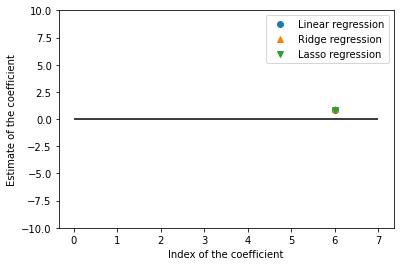

In [56]:
plt.figure()
plt.plot(lr.coef_, 'o', label="Linear regression") 
plt.plot(ridge_cv.coef_, '^', label="Ridge regression") 
plt.plot(lasso_cv.coef_, 'v', label="Lasso regression") 
plt.xlabel("Index of the coefficient") 
plt.ylabel("Estimate of the coefficient") 
plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-10, 10) 
plt.legend()

In [57]:
tree_model = DecisionTreeRegressor().fit(X_train, y_train)
forest_model = RandomForestRegressor().fit(X_train, y_train) 
boost_model = GradientBoostingRegressor().fit(X_train, y_train)

print("Decision Tree")
print("Score on the training set: {:.3f}".format(tree_model.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(tree_model.score(X_test, y_test)))
print("Random forest")
print("Score on the training set: {:.3f}".format(forest_model.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(forest_model.score(X_test, y_test)))
print("Gradient boosting")
print("Score on the training set: {:.3f}".format(boost_model.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(boost_model.score(X_test, y_test)))

Decision Tree
Score on the training set: 1.000
Score on the testing set 0.967
Random forest
Score on the training set: 0.997
Score on the testing set 0.982
Gradient boosting
Score on the training set: 0.972
Score on the testing set 0.971


In [58]:
forest_model_1 = RandomForestRegressor(n_estimators=40).fit(X_train, y_train)
print("Random forest")
print("Score on the training set: {:.3f}".format(forest_model_1.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(forest_model_1.score(X_test, y_test)))

Random forest
Score on the training set: 0.997
Score on the testing set 0.982


In [59]:
forest_model_2 = RandomForestRegressor(n_estimators=150).fit(X_train, y_train)
print("Random forest")
print("Score on the training set: {:.3f}".format(forest_model_2.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(forest_model_2.score(X_test, y_test)))

Random forest
Score on the training set: 0.997
Score on the testing set 0.982


In [61]:
boost_model_1 = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1).fit(X_train, y_train)
print("Gradient boosting")
print("Score on the training set: {:.3f}".format(boost_model_1.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(boost_model_1.score(X_test, y_test)))

Gradient boosting
Score on the training set: 0.950
Score on the testing set 0.950


In [62]:
boost_model_2 = GradientBoostingRegressor(n_estimators=140, learning_rate=0.5).fit(X_train, y_train)
print("Gradient boosting")
print("Score on the training set: {:.3f}".format(boost_model_2.score(X_train, y_train))) 
print("Score on the testing set {:.3f}".format(boost_model_2.score(X_test, y_test)))

Gradient boosting
Score on the training set: 0.983
Score on the testing set 0.980


In [66]:
def plot_feature_importances_cancer(model): 
    n_features = X.shape[1] 
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Features important") 
    plt.ylabel("Feature") 

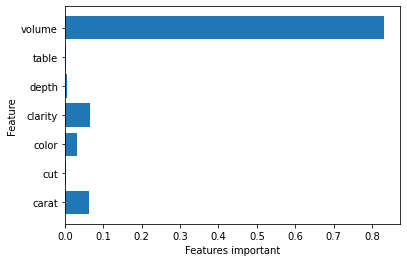

In [67]:
plot_feature_importances_cancer(forest_model_2)

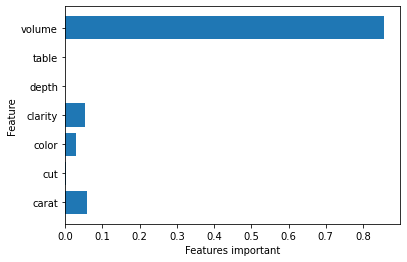

In [68]:
plot_feature_importances_cancer(boost_model_2)